# Testing Deferred Revenue in Python
Will this be easier for everyone to use than Matlab?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Processing Base Billings Data

In [ ]:
df = pd.read_excel('../data/Data_2019_P06/base_billings.xlsx', sheet_name='bill_DC')

In [4]:
df.sample(10)

Document Currency       Enterprise Bu Frequency  \
24720               SEK      Document Cloud       NaN   
13722               EUR  Print & Publishing       NaN   
23960               RUB      Document Cloud       NaN   
3418                AUD  Print & Publishing       NaN   
2971                AUD    Experience Cloud      1TME   
30335               USD    Experience Cloud      ACTL   
21056               JPY    Experience Cloud       NaN   
32569               USD           LiveCycle       NaN   
22331               NOK            Creative       NaN   
2510                AUD    Experience Cloud      ONGO   

      Invoicing Fiscal Year-Period Desc Product Configtype ID  \
24720                           2017-05                   NaN   
13722                           2016-07                    1Y   
23960                           2019-01                   NaN   
3418                            2016-07                    1Y   
2971                            2018-12                   NaN   
30335                           2016-11                   NaN   
21056                           2017-07                    1Y   
32569                           2016-03                   NaN   
22331                           2015-11                   NaN   
2510                            2017-07                    1Y   

      Revenue Recognition Category New Rule For Bill Date Sales Type  \
24720                                D                 Y3   DEFERRED   
13722                                A                NaN   DEFERRED   
23960                                D                NaN   DEFERRED   
3418                                 D                 Y3   DEFERRED   
2971                                 B                NaN   DEFERRED   
30335                                D                NaN   DEFERRED   
21056                                A                NaN   DEFERRED   
32569                                A                NaN   DEFERRED   
22331                                D                 YA   DEFERRED   
2510                                 D                 YQ   DEFERRED   

       Subscription Term  Completed Sales Doc Currency  
24720                  1                      30917.63  
13722                  1                        792.22  
23960                 12                     -21310.86  
3418                   1                      30544.27  
2971                   0                     372778.20  
30335                  0                     155000.00  
21056                  0                     943798.00  
32569                  0                     175383.95  
22331                 12                        680.00  
2510                  12                     144040.00

## Changing the column names early since they are inconsistent across other reports

In [6]:
df.columns

Index(['Document Currency', 'Enterprise Bu', 'Frequency',
       'Invoicing Fiscal Year-Period Desc', 'Product Configtype ID',
       'Revenue Recognition Category New', 'Rule For Bill Date', 'Sales Type',
       'Subscription Term', 'Completed Sales Doc Currency'],
      dtype='object')

In [7]:
df.rename(index = str, columns = {'Document Currency': 'curr',
                                 'Enterprise Bu': 'BU',
                                 'Invoicing Fiscal Year-Period Desc': 'period',
                                 'Product Configtype ID': 'config',
                                 'Rule For Bill Date': 'rebill_rule',
                                 'Completed Sales Doc Currency': 'amount'}, inplace=True)

In [8]:
df.columns

Index(['curr', 'BU', 'Frequency', 'period', 'config',
       'Revenue Recognition Category New', 'rebill_rule', 'Sales Type',
       'Subscription Term', 'amount'],
      dtype='object')

## Remove any currency that has  < 10 transactions. 


In [9]:
# creates a list of the currencies and the number of transactions for each currency
vc = df['curr'].value_counts()

In [10]:
# Create variable that is true if the number of transaction is greater than 10, false otherwise
keep_these = vc.values > 10
# filtering only currencies that were greater than 10
keep_curr = vc[keep_these]
a = keep_curr.index
# filtering the dataframe to remove any of teh currencies not in our list
df = df[df['curr'].isin(a)]

## Just keeping track of the currencies we removed in our model_dict data structure

In [11]:
remove_these = vc.values <= 10
model_dict = {'curr_removed': list(vc[remove_these].index)}
model_dict

{'curr_removed': ['BMD', 'ILS', 'INR', 'MXP', 'SAR']}

## Removing any of the values that are zero

In [12]:
print('This is the length of the dataframe before removing zeros: ', len(df))
df = df[df['amount']!=0]
print('This is the length of the dataframe after removing zeros: ', len(df))

This is the length of the dataframe before removing zeros:  33945
This is the length of the dataframe after removing zeros:  31263


In [13]:
df.sample(10)

curr                BU Frequency   period config  \
3899   BRL          Creative       NaN  2019-06  MTHLY   
26731  USD          Creative       NaN  2017-08     1Y   
20417  JPY    Document Cloud       NaN  2018-11    NaN   
26119  USD          Creative       NaN  2016-04     1Y   
8163   DKK  Experience Cloud      1TME  2016-10  OCONS   
29442  USD  Experience Cloud      ONGO  2015-11     1Y   
3042   AUD  Experience Cloud      ONGO  2019-02    NaN   
28157  USD    Document Cloud       NaN  2017-02     1Y   
20926  JPY  Experience Cloud      1TME  2017-01  OCONS   
28322  USD    Document Cloud       NaN  2017-09    NaN   

      Revenue Recognition Category New rebill_rule   Sales Type  \
3899                                 D         NaN     DEFERRED   
26731                                A         NaN     DEFERRED   
20417                              NaN         NaN   RECOGNIZED   
26119                                A         NaN     DEFERRED   
8163                               NaN         NaN  PRO-SVC-INV   
29442                                D          YA     DEFERRED   
3042                                 A         NaN     DEFERRED   
28157                                D          Y3     DEFERRED   
20926                              NaN         NaN  PRO-SVC-INV   
28322                                A         NaN     DEFERRED   

       Subscription Term       amount  
3899                   1    -19174.30  
26731                  1   8198287.28  
20417                  0  76443153.00  
26119                  0   2221952.04  
8163                   0     27870.00  
29442                  0   4221970.71  
3042                   0      9000.00  
28157                 12      3744.81  
20926                  0  10655000.00  
28322                 12   -387752.29

In [15]:
#df['curr'].value_counts()

## Clearing out the Non-Revenue billings from the file
 - No Idea what these are

In [16]:
df['Sales Type'].value_counts()

DEFERRED       24902
RECOGNIZED      5355
PRO-SVC-INV      906
NON-REV          100
Name: Sales Type, dtype: int64

In [17]:
print('Length of the dataframe before removing non-revenue billings: ', len(df))
df = df[df['Sales Type']!='NON-REV']
print('Length of the dataframe after removing non-revenue billings:  ', len(df))


Length of the dataframe before removing non-revenue billings:  31263
Length of the dataframe after removing non-revenue billings:   31163


## Starting to group the revenue by period, industry, etc

Groupong the billings by the following categories
 - currency
 - period
 - sale type
 

DOING THIS ALL IN PANDAS WITH SPLIT APPLY COMBINE on Sales Type 

In [22]:
# First split the data into three dataframes
# Recognized billings
rec = df[df['Sales Type']=='RECOGNIZED']
svc = df[df['Sales Type']=='PRO-SVC-INV']
dfr = df[df['Sales Type']=='DEFERRED']

In [23]:
# Filter and group billings function will delete temporary datasets as completed
def filter_and_group(data2process, gblist, billings_type=None):
    """filter and group Base Billings Data"""
    
    #when a billings_type is supplied then filter, else just go to groupby below
    if billings_type:
        data2process = data2process[data2process['Revenue Recognition Category New']==billings_type]
    
    #groupby the columns passed in the function call then remove the subscription term column
    gb = data2process.groupby(gblist, as_index=False).sum()
    gb.drop(labels='Subscription Term', axis=1, inplace = True)
    return gb

In [24]:
gb_rec = filter_and_group( rec, ['curr', 'BU', 'period'])
gb_svc = filter_and_group( svc, ['curr', 'BU', 'period'])
gb_a = filter_and_group(dfr, ['curr', 'BU', 'period', 'config'],  'A')
gb_b = filter_and_group(dfr,['curr', 'BU', 'period'],  'B')
gb_d = filter_and_group(dfr,['curr', 'BU', 'period',
                     'rebill_rule'], 'D')

## NOW WORKING ON THE BILLINGS

### Recognized Revenue

In [ ]:
#rec.sample(10)

In [ ]:
# testing groupby object
#gb_rec = rec.groupby(['curr', 'BU', 'period'], as_index=False).sum()

In [ ]:
# the Subscription term hangs around. We are dropping that here
#gb_rec.drop(labels='Subscription Term', axis=1,inplace =True)

In [ ]:
#gb_rec.sample(10)

In [ ]:
#print(type(gb_rec))

### Service Billings

In [ ]:
# testing groupby object
#gb_svc = svc.groupby(['curr', 'BU', 'period'], as_index=False).sum()

In [ ]:
#gb_svc.drop(labels='Subscription Term', axis=1,inplace =True)
#gb_svc.head(5)

### NOW WORKING ON DEFERRED BILLINGS

Type B billings are service agreements that will have invoices submitted before the billings are reclassified to revenue. If no invoices are assigned to the billings, the billings become revenue in 12 months

In [ ]:
# filter out the type B first then do a group_by
#dfr_b = dfr[dfr['Revenue Recognition Category New']=='B']

In [ ]:
#gb_b = dfr_b.groupby(['curr', 'BU', 'period'], as_index=False).sum()

In [ ]:
#gb_b.drop(labels='Subscription Term', axis=1, inplace=True)

In [ ]:
#gb_b.head(10)

In [ ]:
#print('length of deferred billings : ', len(dfr))
#print('length of the type B billings: ', len(dfr_b))

## Now Type A Billings
These billings are on a billing plan. The product config tells us how long before they renew

 - '2Y' = 24 months
 - '1Y' = 12 months
 - 'MTHLY' = 1 month
 
NOTE: There are also other fields in the 'Product Configtype ID' field that do not map well to a rebill period.
To fix this, we need to load up a different file and determine the length of the sales contract (type A no config)
 

In [ ]:
# filtering just the type A billings
#dfr_a = dfr[dfr['Revenue Recognition Category New']=='A']

In [ ]:
#gb_a = dfr_a.groupby(['curr', 'BU', 'period',
#                     'config'], as_index=False).sum()
#gb_a.drop(labels='Subscription Term', axis=1, inplace = True)

In [25]:
gb_a.sample(10)

curr                  BU   period config      amount
2290  JPY            Creative  2017-08  MTHLY -1212150.00
279   AUD      Document Cloud  2019-04     2Y    17142.00
2373  JPY      Document Cloud  2016-02     1Y  6564722.00
3685  USD  Print & Publishing  2015-08     2Y   249054.13
1488  EUR    Experience Cloud  2018-08     1Y   830805.78
51    AUD            Creative  2016-11     1Y  2389935.08
2688  NOK            Creative  2017-04     1Y     7929.40
1466  EUR    Experience Cloud  2017-04     1Y  1232246.69
1455  EUR    Experience Cloud  2016-10  OCONS    37500.00
1052  DKK      Document Cloud  2017-06  MTHLY    -1196.64

In [26]:
gb_a['config'].value_counts()

1Y       1936
MTHLY     829
2Y        693
OUNIV     178
OCONS      62
3Y         58
ONORE      29
Name: config, dtype: int64

### Below is just a check to see how large the billing types are across all periods

In [27]:
gb_a_config = gb_a.groupby(['config'], as_index=False).sum()
gb_a_config

config        amount
0     1Y  7.195507e+10
1     2Y  2.080207e+08
2     3Y  1.560911e+08
3  MTHLY -1.638659e+07
4  OCONS  2.883743e+07
5  ONORE  2.260631e+06
6  OUNIV  3.412069e+06

### These 'OCONS', 'ONORE' and 'OUNIV' data types are not actual product config IDs so we have to get them from a different data file. We are excluding these types below.

In [28]:
config_list = ['1Y', '2Y', '3Y', 'MTHLY']
test1 = gb_a['config'].isin(config_list)
sum(test1)

3516

In [29]:
test1 = gb_a[gb_a['config'].isin(config_list)]

## For now, lets just split this into gb_a_1Y, gb_a_2Y, gb_a_3y, gb_a_1M


In [30]:
gb_a_1Y = test1[test1['config']=='1Y']
gb_a_2Y = test1[test1['config']=='2Y']
gb_a_3Y = test1[test1['config']=='3Y']
gb_a_1M = test1[test1['config']=='MTHLY']

In [31]:
print('this is the lenght of type A 1M billings: ', len(gb_a_1M))
print('this is the lenght of type A 1Y billings: ', len(gb_a_1Y))
print('this is the lenght of type A 2Y billings: ', len(gb_a_2Y))
print('this is the lenght of type A 3Y billings: ', len(gb_a_3Y))

this is the lenght of type A 1M billings:  829
this is the lenght of type A 1Y billings:  1936
this is the lenght of type A 2Y billings:  693
this is the lenght of type A 3Y billings:  58


## TYPE D billings
These billings have a field 'Rule For Bill Date' that determines when new billings will occur
 - Monthly [Y1, Y2, Y3, Y5]
 - Quarterly [YQ]
 - Every 4 months [YT]
 - Semi-annual [YH]
 - Annual [YA, YC]
 - Every 2 years - [Y4]
 
 We also need to track the type D billings that do not have a 'Rule for Bill Date'

In [ ]:
# for now just do a groupby on the type
# filtering just the type A billings
#dfr_d = dfr[dfr['Revenue Recognition Category New']=='D']

In [ ]:
#gb_d = dfr_d.groupby(['curr', 'BU', 'period',
#                     'rebill_rule'], as_index=False).sum()
#gb_d.drop(labels='Subscription Term', axis=1, inplace = True)

In [32]:
gb_d_mthly = gb_d[gb_d['rebill_rule'].isin(['Y1', 'Y2', 'Y3', 'Y5'])]
gb_d_qtrly = gb_d[gb_d['rebill_rule']=='YQ']
gb_d_four_mths = gb_d[gb_d['rebill_rule']=='YT']
gb_d_semi_ann = gb_d[gb_d['rebill_rule']=='YH']
gb_d_annual = gb_d[gb_d['rebill_rule'].isin(['YA', 'YC'])]
gb_d_two_yrs = gb_d[gb_d['rebill_rule']=='Y4']

In [33]:
gb_d['rebill_rule'].value_counts()

YA    1799
Y3    1582
YQ     571
Y1     271
YH     255
YC     255
Y2      97
Y4      27
Y7      21
YT       8
BT       1
Name: rebill_rule, dtype: int64

In [37]:
#gb_d['curr'].value_counts()

### Note: There is one type D billings that is listed as 'BT' I don't know what this means, but it was a $180 EUR payment from January 2017, so we will ignore

In [38]:
print('Length of monthly', len(gb_d_mthly))
print('Length of quarterly', len(gb_d_qtrly))
print('Length of four months', len(gb_d_four_mths))
print('Length of semi ann', len(gb_d_semi_ann))
print('Length of annual', len(gb_d_annual))
print('Length of two years', len(gb_d_two_yrs))

Length of monthly 1950
Length of quarterly 571
Length of four months 8
Length of semi ann 255
Length of annual 2054
Length of two years 27


In [39]:
what_is_BT = gb_d[gb_d['rebill_rule']=='YT']
what_is_BT.head(10)

curr                BU   period rebill_rule     amount
4417  USD  Experience Cloud  2015-06          YT   11666.60
4431  USD  Experience Cloud  2015-08          YT  549861.11
4444  USD  Experience Cloud  2015-10          YT   11666.60
4464  USD  Experience Cloud  2016-01          YT  612916.60
4469  USD  Experience Cloud  2016-02          YT -601250.00
4529  USD  Experience Cloud  2016-12          YT   13440.00
4553  USD  Experience Cloud  2017-04          YT   13440.00
4577  USD  Experience Cloud  2017-08          YT   13440.00

## Note: There are only 8 payments (back from 2017) that paid on a 4 month basis. 
We will ignore these as well.

## NOW WE NEED TO BUILD A DATAFRAME THAT INTEGRATES THIS DATA

- We will have the following descriptive fields
   - Invoicing Fiscal Year-Period
   - Document Currency
   - Enterprise BU

- We will have the following fields based on rebilling rule
   - Recognized
   - Service
   - Monthly
   - Quarterly
   - Annual
   - Two Years
   - Three Years

In [40]:
# We need to do it this way when we get to a .py file!
list_df = [gb_rec, gb_svc, gb_b,
        gb_a_1M,    gb_a_1Y,    gb_a_2Y,       gb_a_3Y, 
        gb_d_mthly, gb_d_qtrly, gb_d_semi_ann, gb_d_annual, gb_d_two_yrs]

list_columns = ['recognized', 'service', 'deferred_B', 
    'deferred_1M_a', 'deferred_1Y_a', 'deferred_2Y_a', 'deferred_3Y_a',
    'deferred_1M_d', 'deferred_3M_d', 'deferred_6M_d', 'deferred_1Y_d', 'deferred_2Y_d']


In [41]:
def merge_new_dataframe(old_df, new_df, new_column):
    df_merged = pd.merge(old_df, new_df, how='outer', 
                     left_on=['curr', 'BU', 'period'],
                    right_on=['curr', 'BU', 'period'])
    df_merged.rename(index=str, columns={'amount': new_column}, inplace=True)
    
    #need to drop the product configtype id for merges where the new_df is of type A
    config_str = 'config'
    rule_str = 'rebill_rule'
    if config_str in df_merged.columns:
        df_merged.drop(columns=['config'], inplace=True)
    
    if rule_str in df_merged.columns:
        df_merged.drop(columns=['rebill_rule'], inplace=True)
        
    return df_merged

In [42]:
def merge_all_dataframes(list_df, list_columns):
    for i, df in enumerate(list_df):
        print('This is i:', i)
        #print("This is the df: ", df.head())
        print('referencing the column: ', list_columns[i])

        if i==0:
            df_merged = list_df[0]
            df_merged.rename(index=str, columns={'amount': list_columns[i]}, inplace=True)
        else:
            df_merged = merge_new_dataframe(df_merged, df, list_columns[i])

    return df_merged
    

In [43]:
df = merge_all_dataframes(list_df, list_columns)

This is i: 0
referencing the column:  recognized
This is i: 1
referencing the column:  service
This is i: 2
referencing the column:  deferred_B
This is i: 3
referencing the column:  deferred_1M_a
This is i: 4
referencing the column:  deferred_1Y_a
This is i: 5
referencing the column:  deferred_2Y_a
This is i: 6
referencing the column:  deferred_3Y_a
This is i: 7
referencing the column:  deferred_1M_d
This is i: 8
referencing the column:  deferred_3M_d
This is i: 9
referencing the column:  deferred_6M_d
This is i: 10
referencing the column:  deferred_1Y_d
This is i: 11
referencing the column:  deferred_2Y_d


In [44]:
df.sample(10)

curr                  BU   period    recognized     service  deferred_B  \
1213  EUR  Print & Publishing  2017-05  5.010750e+05         NaN         NaN   
2145  NZD    Experience Cloud  2015-11  7.987416e+05         NaN         NaN   
171   AUD    Experience Cloud  2019-03  2.726877e+06  1337705.99    558117.5   
125   AUD    Experience Cloud  2016-04  4.501875e+06   284306.25    130450.0   
2538  USD            Creative  2017-05  8.589657e+06    80000.00         NaN   
1051  EUR    Experience Cloud  2018-07  1.268504e+06  2655463.34    437633.0   
1119  EUR           LiveCycle  2017-09  3.462472e+04         NaN         NaN   
1635  JPY            Creative  2016-09  1.057593e+08         NaN         NaN   
221   AUD     Other Solutions  2017-09 -6.645950e+03         NaN         NaN   
884   EUR            Creative  2019-04  1.210585e+06         NaN         NaN   

      deferred_1M_a  deferred_1Y_a  deferred_2Y_a  deferred_3Y_a  \
1213            NaN   2.941812e+05       30883.28            NaN   
2145            NaN            NaN            NaN            NaN   
171             NaN   1.168486e+05            NaN            NaN   
125             NaN   9.549371e+04            NaN            NaN   
2538      604187.42   4.624682e+07       97823.00            NaN   
1051            NaN   3.640284e+05            NaN            NaN   
1119            NaN   9.344239e+04            NaN            NaN   
1635     -169634.00   1.368792e+09     7326720.00            NaN   
221             NaN            NaN            NaN            NaN   
884             NaN   2.854662e+07      104344.80            NaN   

      deferred_1M_d  deferred_3M_d  deferred_6M_d  deferred_1Y_d  \
1213   6.614869e+04            NaN            NaN       91434.81   
2145            NaN            NaN            NaN            NaN   
171             NaN     1128476.52      624389.81     7710222.60   
125    5.448500e+04      621045.62            NaN      294440.00   
2538   5.749960e+03       55175.00            NaN    27033637.95   
1051   2.498007e+04      522929.27      332758.98     -121146.01   
1119            NaN            NaN            NaN            NaN   
1635   1.163461e+09            NaN            NaN      902400.00   
221             NaN            NaN            NaN            NaN   
884    3.611308e+07            NaN            NaN     8526173.22   

      deferred_2Y_d  
1213            NaN  
2145            NaN  
171             NaN  
125             NaN  
2538            NaN  
1051            NaN  
1119            NaN  
1635            NaN  
221             NaN  
884             NaN

In [46]:
#df['curr'].value_counts()

In [47]:
def clean_df_columns(df):
    
    # clean up NaNs before adding 
    df = df.fillna(value=0)
    
    # Monthly
    df['deferred_1M'] = df['deferred_1M_a']+df['deferred_1M_d']
    df.drop(labels=['deferred_1M_a', 'deferred_1M_d'], axis=1, inplace=True)
    
    # Annual
    df['deferred_1Y'] = df['deferred_1Y_a']+df['deferred_1Y_d']
    df.drop(labels=['deferred_1Y_a', 'deferred_1Y_d'], axis=1, inplace=True)
    
    # Two-Year
    df['deferred_2Y'] = df['deferred_2Y_a']+df['deferred_2Y_d']
    df.drop(labels=['deferred_2Y_a', 'deferred_2Y_d'], axis=1, inplace=True)
    
    # renaming 3Y, 3M and 6M
    df.rename(index=str, columns = {'deferred_3Y_a':'deferred_3Y', 'deferred_3M_d':'deferred_3M', 
                               'deferred_6M_d': 'deferred_6M'}, inplace=True)

    #cleaning up the longer column names
    df.rename(index=str, columns = {'curr': 'curr',
                               'BU':'BU',
                               'period':'period'}, inplace=True)
    
    return df

In [48]:
df = clean_df_columns(df)

In [49]:
df.sample(10)

curr                  BU   period   recognized      service  deferred_B  \
264   AUD  Print & Publishing  2017-09     95865.70         0.00        0.00   
2633  USD      Document Cloud  2016-04  15811880.87         0.00        0.00   
422   CHF            Creative  2019-05     39070.00         0.00        0.00   
1861  JPY     Other Solutions  2016-09   -213790.00         0.00        0.00   
895   EUR      Document Cloud  2015-12  13896637.64         0.00        0.00   
2420  SEK  Print & Publishing  2017-04      7648.00         0.00        0.00   
666   DKK      Document Cloud  2015-10     37480.00         0.00        0.00   
2845  USD    Experience Cloud  2018-09   7062507.87  16258782.58  5010336.88   
1144  EUR     Other Solutions  2015-10     -1392.30         0.00        0.00   
379   CHF            Creative  2015-10     87940.50         0.00        0.00   

      deferred_3Y  deferred_3M  deferred_6M  deferred_1M  deferred_1Y  \
264           0.0          0.0         0.00     43720.33    275228.93   
2633          0.0      16375.0         0.00   3066731.07  13354043.00   
422           0.0          0.0         0.00   2645481.52    972812.54   
1861          0.0          0.0         0.00         0.00         0.00   
895           0.0          0.0         0.00    366688.90  13414907.02   
2420          0.0          0.0         0.00     27692.60      1410.00   
666           0.0          0.0         0.00    145361.86    234411.80   
2845          0.0    9342182.9    436415.74     62179.16   7745735.88   
1144          0.0          0.0         0.00         0.00         0.00   
379           0.0          0.0         0.00   1091507.50    426253.93   

      deferred_2Y  
264         456.0  
2633     355807.0  
422           0.0  
1861          0.0  
895      200934.0  
2420          0.0  
666           0.0  
2845          0.0  
1144          0.0  
379           0.0

In [51]:
#df.curr.value_counts()

In [52]:
# Make this a function to be cleaned up somehow
del dfr
#del dfr_a
#del dfr_b
#del dfr_d
del gb_a
del gb_a_1M
del gb_a_1Y
del gb_a_2Y
del gb_a_3Y
del gb_b, 
del gb_d
del gb_svc, gb_rec, gb_d_two_yrs
del gb_d_four_mths, gb_d_qtrly, gb_d_semi_ann


# Now working on the ZCC billings

These billings are type D billings that did not populate the rebill_rule field of the database.

They have a 'sales document type' = 'ZCC"

The billings themselves are being created from a tableau report that looks for additions to the deferred revenue waterfall based on billings of type D and have a sales document type of ZCC

In [53]:
df.sample(10)

curr                  BU   period    recognized     service  deferred_B  \
1747  JPY      Document Cloud  2018-05  2.560764e+08        0.00         0.0   
698   DKK      Document Cloud  2019-02  6.360000e+03        0.00         0.0   
2412  SEK  Print & Publishing  2016-08  3.190000e+04        0.00         0.0   
377   CHF            Creative  2015-08  8.011909e+04        0.00         0.0   
276   AUD  Print & Publishing  2018-08  7.007495e+04        0.00         0.0   
1053  EUR    Experience Cloud  2018-07  1.268504e+06  2655463.34    437633.0   
924   EUR      Document Cloud  2018-01  3.874712e+06        0.00         0.0   
2502  USD            Creative  2016-06  1.105508e+07    10125.00    -29690.0   
320   CAD    Experience Cloud  2016-10  5.712756e+04   349584.97         0.0   
2620  USD      Document Cloud  2015-08  1.570581e+07        0.00         0.0   

      deferred_3Y  deferred_3M  deferred_6M  deferred_1M   deferred_1Y  \
1747          0.0         0.00         0.00  14512234.00  9.743415e+07   
698           0.0         0.00         0.00    145467.37  2.535714e+05   
2412          0.0         0.00         0.00     26520.30 -2.400000e+02   
377           0.0         0.00         0.00   1061204.03  2.350630e+05   
276           0.0         0.00         0.00     32982.59  1.761792e+05   
1053          0.0    522929.27    332758.98     40103.88  2.428824e+05   
924           0.0         0.00         0.00    313921.61  4.287298e+06   
2502          0.0    672870.27    218150.47    561926.46  1.213093e+08   
320           0.0    199392.50         0.00         0.00  1.186434e+05   
2620          0.0         0.00         0.00   4255347.69  6.272724e+06   

      deferred_2Y  
1747       2338.0  
698           0.0  
2412          0.0  
377           0.0  
276           0.0  
1053          0.0  
924       72498.0  
2502      97736.2  
320           0.0  
2620     412191.0

# TO BE DONE:

1. Clean up the type F billings (at least check to see if they are necessary)
2. Make a function to delete all intermediate dataframes
3. Add type A no config function
4. Add type D ZCC billings

5. Work on the forecast part of this

6. Load up FX rates

In [54]:
# Adobe financial calendar
df_cal = pd.read_excel('../data/Data_2019_P06/ADOBE_FINANCIAL_CALENDAR.xlsx', 'ADBE_cal')

In [55]:
df_cal.head()

Year  Quarter  Period Qtr_Ticker  Qtr_Start    Qtr_End Per_Ticker  \
0  2010        1       1      Q1_10 2009-11-28 2010-03-05      P1_10   
1  2010        1       2      Q1_10 2009-11-28 2010-03-05      P2_10   
2  2010        1       3      Q1_10 2009-11-28 2010-03-05      P3_10   
3  2010        2       4      Q2_10 2010-03-06 2010-06-04      P4_10   
4  2010        2       5      Q2_10 2010-03-06 2010-06-04      P5_10   

   Per_Start    Per_End  
0 2009-11-28 2010-01-01  
1 2010-01-02 2010-01-29  
2 2010-01-30 2010-03-05  
3 2010-03-06 2010-04-02  
4 2010-04-03 2010-04-30

## ZCC Billings

In [56]:
df_ZCC = pd.read_excel('../data/Data_2019_P06/type_D_ZCC_billings.xlsx', sheet_name='DC')

In [57]:
df_ZCC.sample(10)

Document Currency Enterprise BU Description Rev Rec Category  \
3288               JPY          Experience Cloud                D   
1996               EUR          Experience Cloud                D   
2648               GBP          Experience Cloud                D   
3986               USD            Document Cloud                D   
3211               JPY          Experience Cloud                D   
4733               USD          Experience Cloud                D   
2429               GBP          Experience Cloud                D   
5085               USD          Experience Cloud                D   
1233               DKK          Experience Cloud                D   
3974               USD            Document Cloud                D   

     Rule for Bill Date Code Week of FICA Posting Date (YYYYMMDD) (copy)  \
3288                      YA                                  2018-08-19   
1996                      YH                                  2019-01-06   
2648                      YA                                  2017-06-25   
3986                      YA                                  2018-05-27   
3211                      YA                                  2017-12-10   
4733                      YC                                  2017-11-26   
2429                      Y1                                  2016-03-27   
5085                      YQ                                  2017-12-31   
1233                      YA                                  2018-11-25   
3974                      YA                                  2018-08-19   

      DF Additions - Doc Curr  
3288               8799600.00  
1996                 43200.00  
2648                952714.20  
3986               5037462.99  
3211              -2204400.00  
4733                708404.15  
2429                    97.63  
5085              15101702.29  
1233               1524622.19  
3974               2588017.39

### Renaming the columns

In [58]:
df_ZCC.columns

Index(['Document Currency', 'Enterprise BU Description', 'Rev Rec Category',
       'Rule for Bill Date Code',
       'Week of FICA Posting Date (YYYYMMDD) (copy)',
       'DF Additions - Doc Curr'],
      dtype='object')

In [59]:
df_ZCC.rename(index = str, columns = {'Document Currency': 'curr',
                                      'Enterprise BU Description':'BU',
                                      'Rule for Bill Date Code': 'rebill_rule',
                                      'Week of FICA Posting Date (YYYYMMDD) (copy)': 'fiscal_week',
                                      'DF Additions - Doc Curr': 'amount'}, inplace = True)

In [60]:
df_ZCC.columns

Index(['curr', 'BU', 'Rev Rec Category', 'rebill_rule', 'fiscal_week',
       'amount'],
      dtype='object')

### Checking that we do not have any currencies that need to be removed


In [61]:
df_ZCC['curr'].value_counts()

USD    1415
EUR     926
AUD     716
GBP     678
JPY     558
CAD     328
DKK     177
SEK     174
CHF     116
NOK      76
SGD       1
Name: curr, dtype: int64

In [62]:
model_dict

{'curr_removed': ['BMD', 'ILS', 'INR', 'MXP', 'SAR']}

In [63]:
ZCC_curr = df_ZCC['curr'].unique()

In [64]:
for item in ZCC_curr:
    if item in model_dict['curr_removed']:
        print('This currency needs to be removed: ', item)

There are no currencies that need to be removed

# Now we are clearing out nans

In [65]:
print('Number of NaNs to be cleared out: ', sum(df_ZCC['amount'].isna()))
ZCC_isna = df_ZCC['amount'].isna()
print("This is the length of the ZCC records before clearing NAs: ", len(df_ZCC))
df_ZCC = df_ZCC[~ZCC_isna]
print("This is the length of the ZCC records before clearing NAs: ", len(df_ZCC))

Number of NaNs to be cleared out:  44
This is the length of the ZCC records before clearing NAs:  5165
This is the length of the ZCC records before clearing NAs:  5121


In [66]:
df_cal.sample(5)

Year  Quarter  Period Qtr_Ticker  Qtr_Start    Qtr_End Per_Ticker  \
110  2019        1       3      Q1_19 2018-12-01 2019-03-01      P3_19   
242  2030        1       3      Q1_30 2029-12-01 2030-03-01      P3_30   
133  2021        1       2      Q1_21 2020-11-28 2021-03-05      P2_21   
172  2024        2       5      Q2_24 2024-03-02 2024-05-31      P5_24   
229  2029        1       2      Q1_29 2028-12-02 2029-03-02      P2_29   

     Per_Start    Per_End  
110 2019-01-26 2019-03-01  
242 2030-01-26 2030-03-01  
133 2021-01-02 2021-01-29  
172 2024-03-30 2024-04-26  
229 2028-12-30 2029-01-26

In [67]:
df_ZCC.sample(10)

curr                BU Rev Rec Category rebill_rule fiscal_week  \
4582  USD  Experience Cloud                D          YC  2018-07-29   
2479  GBP  Experience Cloud                D          YA  2017-10-15   
3017  JPY          Creative                D          YA  2019-05-05   
3658  SEK  Experience Cloud                D          YH  2016-06-05   
1840  EUR  Experience Cloud                D          YA  2018-03-04   
4519  USD  Experience Cloud                D          YA  2018-08-26   
4711  USD  Experience Cloud                D          YC  2016-05-29   
455   AUD  Experience Cloud                D          YC  2018-05-13   
3557  NOK  Experience Cloud                D          YQ  2018-09-02   
1118  CHF  Experience Cloud                D          YA  2015-06-28   

            amount  
4582 -2.000000e+04  
2479 -9.476166e+04  
3017  1.443488e+08  
3658 -3.260730e+05  
1840  1.027116e+06  
4519  6.474850e+06  
4711  1.318246e+05  
455   4.800000e+03  
3557  6.747750e+05  
1118  1.551714e+05

In [68]:
def add_ZCC_periods(df_ZCC, df_cal):
    ''' 
    Takes each ZCC period billing and maps it to the fiscal calendar then assignes the
    ZCC billing to the dataframe df
    '''
    period_list = []
    
    for i in range(len(df_ZCC)):
        # this_date is the date we need mapped to a period
        this_date = df_ZCC['fiscal_week'].iloc[i]
        
        #max index will be the index to the period in our financial calendar
        this_index = df_cal['Per_End']<=this_date
        max_index = sum(this_index)

        this_year = df_cal['Year'].iloc[max_index].astype(str)
        this_period= df_cal['Period'].iloc[max_index].astype(str)

        # formatting the period string from the calendar
        if len(this_period)== 1:
            this_period = '0'+this_period

        period_ticker = this_year + '-' + this_period

        period_list.append(period_ticker)

    df_ZCC['period'] = period_list
    return df_ZCC


In [69]:
df_ZCC.head()

curr        BU Rev Rec Category rebill_rule fiscal_week   amount
1  AUD  Creative                D          YA  2019-04-21 -3254.76
2  AUD  Creative                D          YA  2017-07-16  2070.00
3  AUD  Creative                D          YA  2017-05-28  4560.00
4  AUD  Creative                D          YA  2018-01-07  6657.92
5  AUD  Creative                D          YA  2017-12-31  8274.87

In [70]:
df_ZCC = add_ZCC_periods(df_ZCC, df_cal)

In [71]:
df_ZCC.tail()

curr                  BU Rev Rec Category rebill_rule fiscal_week  \
5160  USD  Print & Publishing                D          YC  2018-12-16   
5161  USD  Print & Publishing                D          YC  2018-12-30   
5162  USD  Print & Publishing                D          YC  2019-02-24   
5163  USD  Print & Publishing                D          YH  2018-12-30   
5164  USD  Print & Publishing                D          YQ  2019-03-24   

        amount   period  
5160   8000.00  2019-01  
5161  14745.00  2019-02  
5162  17218.60  2019-03  
5163   3256.50  2019-02  
5164    201.75  2019-04

In [73]:
#df_ZCC.curr.value_counts()

## Now we need to determine the length of the ZCC billings to and add this to our dataframe

In [74]:
df.columns

Index(['curr', 'BU', 'period', 'recognized', 'service', 'deferred_B',
       'deferred_3Y', 'deferred_3M', 'deferred_6M', 'deferred_1M',
       'deferred_1Y', 'deferred_2Y'],
      dtype='object')

In [75]:
df_ZCC.columns

Index(['curr', 'BU', 'Rev Rec Category', 'rebill_rule', 'fiscal_week',
       'amount', 'period'],
      dtype='object')

In [76]:
gb_ZCC = df_ZCC.groupby(['curr', 'BU', 'period',
                     'rebill_rule'], as_index=False).sum()
#gb_d.drop(labels='Subscription Term', axis=1, inplace = True)

In [77]:
gb_ZCC.sample(20)

curr                BU   period rebill_rule       amount
369   CAD  Experience Cloud  2018-10          Y1     32087.50
1460  SEK  Experience Cloud  2015-05          YA    759450.60
735   EUR  Experience Cloud  2016-07          YC     25884.00
1834  USD  Experience Cloud  2017-09          Y1   5960982.81
1879  USD  Experience Cloud  2018-04          Y3      1386.00
1389  JPY  Experience Cloud  2019-03          YC   5981146.00
154   AUD  Experience Cloud  2017-12          Y1    209524.48
1794  USD  Experience Cloud  2017-02          YA  50177509.77
1481  SEK  Experience Cloud  2016-01          YH    174271.87
512   DKK  Experience Cloud  2016-05          YH     63774.00
1301  JPY  Experience Cloud  2016-12          Y1  44612730.00
1258  JPY  Experience Cloud  2015-11          YH   4908600.00
1497  SEK  Experience Cloud  2016-07          YQ     84996.96
425   CHF  Experience Cloud  2016-08          YA     67603.19
1842  USD  Experience Cloud  2017-10          YA   5757355.49
736   EUR  Experience Cloud  2016-07          YH    354098.56
150   AUD  Experience Cloud  2017-10          YQ     69608.69
338   CAD  Experience Cloud  2017-12          Y1     77258.67
1903  USD  Experience Cloud  2018-08          YA  25376368.13
1539  SEK  Experience Cloud  2018-08          YQ    280410.77

In [78]:
gb_ZCC['rebill_rule'].value_counts()

YA    783
YQ    438
YH    245
Y1    235
YC    203
Y3     72
Y4     11
YX      2
Name: rebill_rule, dtype: int64

In [80]:
#gb_ZCC.curr.value_counts()

In [81]:
gb_ZCC_mthly = gb_ZCC[gb_ZCC['rebill_rule'].isin(['Y1', 'Y2', 'Y3', 'Y5'])]
gb_ZCC_qtrly = gb_ZCC[gb_ZCC['rebill_rule']=='YQ']
gb_ZCC_four_mths = gb_ZCC[gb_ZCC['rebill_rule']=='YT']
gb_ZCC_semi_ann = gb_ZCC[gb_ZCC['rebill_rule']=='YH']
gb_ZCC_annual = gb_ZCC[gb_ZCC['rebill_rule'].isin(['YA', 'YC'])]
gb_ZCC_two_yrs = gb_ZCC[gb_ZCC['rebill_rule']=='Y4']

There are no four month billings

In [82]:
len(gb_ZCC_four_mths)

0

There are two YX billings for small amounts that I do not have mapped to a frequency.
They will be ignored

In [83]:
what_is_YX = gb_ZCC[gb_ZCC['rebill_rule']=='YX']
what_is_YX.head(10)

curr              BU   period rebill_rule     amount
645   EUR  Document Cloud  2017-12          YX        0.0
1220  JPY  Document Cloud  2018-11          YX  1522800.0

## I need to merge the ZCC billings and then clean up the columns. 
 


In [84]:
# We need to do it this way when we get to a .py file!
list_ZCC_df = [gb_ZCC_mthly, gb_ZCC_qtrly, gb_ZCC_semi_ann,
           gb_ZCC_annual, gb_ZCC_two_yrs]

list_ZCC_columns = ['deferred_1M', 'deferred_3M', 'deferred_6M', 
    'deferred_1Y', 'deferred_2Y']


In [85]:
df_ZCC_merged = merge_all_dataframes(list_ZCC_df, list_ZCC_columns)

This is i: 0
referencing the column:  deferred_1M
This is i: 1
referencing the column:  deferred_3M
This is i: 2
referencing the column:  deferred_6M
This is i: 3
referencing the column:  deferred_1Y
This is i: 4
referencing the column:  deferred_2Y


C:\Users\davsmith\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [86]:
df_ZCC_merged.sample(10)

curr                BU   period rebill_rule_x  deferred_1M rebill_rule_y  \
965   GBP          Creative  2018-04           NaN          NaN           NaN   
203   GBP  Experience Cloud  2016-07            Y1        97.74            YQ   
897   CHF  Experience Cloud  2017-10           NaN          NaN           NaN   
192   EUR  Experience Cloud  2019-06            Y1     23609.14            YQ   
265   JPY  Experience Cloud  2016-10            Y1  22882365.00            YQ   
1094  USD          Creative  2017-06           NaN          NaN           NaN   
603   GBP          Creative  2019-03           NaN          NaN            YQ   
918   EUR          Creative  2017-11           NaN          NaN           NaN   
45    AUD  Experience Cloud  2018-09            Y1    219508.65            YQ   
625   GBP  Experience Cloud  2018-04           NaN          NaN            YQ   

      deferred_3M  deferred_6M   deferred_1Y  deferred_2Y  
965           NaN          NaN  1.951320e+05          NaN  
203     273562.84      8390.95  1.079693e+06          NaN  
897           NaN          NaN  3.299100e+05          NaN  
192     537447.27     83040.00  3.119446e+06          NaN  
265    1875000.00    600000.00  1.545656e+08          NaN  
1094          NaN          NaN  1.538768e+05          NaN  
603       4945.65          NaN  1.945881e+06          NaN  
918           NaN          NaN  1.244917e+06          NaN  
45      232214.98          NaN  4.727483e+06          NaN  
625     262039.01      2490.00  1.929217e+06          NaN

In [88]:
#df_ZCC_merged.curr.value_counts()

### Clearing out any zeros

In [89]:
df_ZCC_merged.drop(columns=['rebill_rule_x', 'rebill_rule_y'], inplace=True)
df_ZCC_merged.fillna(0, inplace=True)
df_ZCC_merged.sample(10)

curr                  BU   period  deferred_1M  deferred_3M  deferred_6M  \
785   AUD      Document Cloud  2018-08         0.00         0.00         0.00   
649   NOK    Experience Cloud  2018-09         0.00   1008000.00         0.00   
12    AUD    Experience Cloud  2016-03    302726.11    141566.48     24600.00   
796   AUD  Print & Publishing  2018-05         0.00         0.00         0.00   
345   USD    Experience Cloud  2016-05     39780.00   1113203.91      5280.00   
985   GBP      Document Cloud  2018-09         0.00         0.00         0.00   
1125  USD      Document Cloud  2019-01         0.00         0.00         0.00   
352   USD    Experience Cloud  2016-07   2965632.00  10337771.26   2504987.91   
144   EUR    Experience Cloud  2017-09       840.00    -61668.28    149121.64   
768   AUD            Creative  2018-11         0.00         0.00         0.00   

      deferred_1Y  deferred_2Y  
785     784659.14          0.0  
649    4509803.43          0.0  
12      227468.39          0.0  
796       3812.25          0.0  
345    3535271.74          0.0  
985     112429.45          0.0  
1125     62379.73          0.0  
352     203015.36          0.0  
144      37200.12          0.0  
768     716531.34          0.0

In [90]:
df.columns

Index(['curr', 'BU', 'period', 'recognized', 'service', 'deferred_B',
       'deferred_3Y', 'deferred_3M', 'deferred_6M', 'deferred_1M',
       'deferred_1Y', 'deferred_2Y'],
      dtype='object')

In [91]:
df_cal.sample(5)

Year  Quarter  Period Qtr_Ticker  Qtr_Start    Qtr_End Per_Ticker  \
212  2027        3       9      Q3_27 2027-06-05 2027-09-03      P9_27   
191  2025        4      12      Q4_25 2025-08-30 2025-11-28     P12_25   
43   2013        3       8      Q3_13 2013-06-01 2013-08-30      P8_13   
201  2026        4      10      Q4_26 2026-08-29 2026-11-27     P10_26   
91   2017        3       8      Q3_17 2017-06-03 2017-09-01      P8_17   

     Per_Start    Per_End  
212 2027-07-31 2027-09-03  
191 2025-10-25 2025-11-28  
43  2013-06-29 2013-07-26  
201 2026-08-29 2026-09-25  
91  2017-07-01 2017-07-28

In [92]:
test_merge = pd.merge(df, df_ZCC_merged, how='outer', 
                 left_on=['curr', 'BU', 'period'],
                right_on=['curr', 'BU', 'period'])
#test_merge.rename(index=str, columns={'amount': new_column}, inplace=True)


In [93]:

# clean up NaNs before adding 
test_merge = test_merge.fillna(value=0)

# Monthly
test_merge['deferred_1M'] = test_merge['deferred_1M_x']+test_merge['deferred_1M_y']
test_merge.drop(labels=['deferred_1M_x', 'deferred_1M_y'], axis=1, inplace=True)

# Quarterly
test_merge['deferred_3M'] = test_merge['deferred_3M_x']+test_merge['deferred_3M_y']
test_merge.drop(labels=['deferred_3M_x', 'deferred_3M_y'], axis=1, inplace=True)

# Semi-Annual
test_merge['deferred_6M'] = test_merge['deferred_6M_x']+test_merge['deferred_6M_y']
test_merge.drop(labels=['deferred_6M_x', 'deferred_6M_y'], axis=1, inplace=True)

# Annual
test_merge['deferred_1Y'] = test_merge['deferred_1Y_x']+test_merge['deferred_1Y_y']
test_merge.drop(labels=['deferred_1Y_x', 'deferred_1Y_y'], axis=1, inplace=True)

# 2-Years
test_merge['deferred_2Y'] = test_merge['deferred_2Y_x']+test_merge['deferred_2Y_y']
test_merge.drop(labels=['deferred_2Y_x', 'deferred_2Y_y'], axis=1, inplace=True)


In [94]:
test_merge.columns

Index(['curr', 'BU', 'period', 'recognized', 'service', 'deferred_B',
       'deferred_3Y', 'deferred_1M', 'deferred_3M', 'deferred_6M',
       'deferred_1Y', 'deferred_2Y'],
      dtype='object')

In [95]:
test_merge.sample(20)

curr                  BU   period    recognized      service  deferred_B  \
2225  JPY  Print & Publishing  2016-08  1.090950e+07         0.00        0.00   
1516  GBP            Creative  2018-08  1.820598e+05         0.00        0.00   
2501  RUB            Creative  2019-04  9.314708e+04         0.00        0.00   
881   EUR            Creative  2016-04  1.657114e+06         0.00        0.00   
2790  USD            Creative  2015-10  1.260852e+07    162575.00        0.00   
1920  JPY            Creative  2017-03  1.286617e+08         0.00        0.00   
1205  EUR    Experience Cloud  2018-02  2.138158e+06      -386.39   434930.02   
1138  EUR    Experience Cloud  2017-07  1.333460e+06   1788440.10   485711.82   
1426  EUR     Other Solutions  2019-06 -1.030253e+04         0.00        0.00   
4172  COP            Creative  2019-05  0.000000e+00         0.00        0.00   
1381  EUR     Other Solutions  2015-09 -1.162168e+04         0.00        0.00   
1179  EUR    Experience Cloud  2017-12  1.403764e+06   3100131.50   872246.05   
3145  USD    Experience Cloud  2015-12  2.396980e+07  15280069.25   484605.65   
315   BRL            Creative  2018-07  1.290500e+04         0.00        0.00   
3105  USD    Experience Cloud  2015-09  1.775494e+07  12478857.74  5347981.86   
424   CHF            Creative  2016-08  3.960500e+04         0.00        0.00   
1474  EUR  Print & Publishing  2019-04  1.950826e+05         0.00        0.00   
2049  JPY      Document Cloud  2019-01  2.587124e+08         0.00        0.00   
1568  GBP      Document Cloud  2018-09  5.825553e+05         0.00     2145.00   
679   DKK            Creative  2017-09  1.594460e+05         0.00        0.00   

      deferred_3Y   deferred_1M  deferred_3M  deferred_6M   deferred_1Y  \
2225          0.0  6.950630e+05         0.00         0.00  5.910612e+06   
1516          0.0  1.242785e+07         0.00         0.00  9.727252e+06   
2501          0.0  4.733224e+07         0.00         0.00  6.007237e+06   
881           0.0  1.475702e+07         0.00         0.00  1.323076e+07   
2790          0.0  3.081983e+05    556992.89    242346.45  6.497854e+07   
1920          0.0  1.430221e+09         0.00         0.00  2.369876e+09   
1205          0.0  1.650005e+05   2460333.56   2740234.54  4.867723e+06   
1138          0.0  2.022407e+05   1604900.38    364699.50  4.158601e+06   
1426          0.0  0.000000e+00         0.00         0.00  0.000000e+00   
4172          0.0  1.799160e+08         0.00         0.00  2.092358e+08   
1381          0.0  0.000000e+00         0.00         0.00  0.000000e+00   
1179          0.0  4.677769e+05   2322844.16    477099.81  1.563874e+07   
3145          0.0  3.740097e+06  13237082.51    858248.04  6.511450e+07   
315           0.0  5.998770e+05         0.00         0.00  4.869287e+05   
3105          0.0  4.611614e+06  11908469.93     65209.85  4.283718e+07   
424           0.0  1.383238e+06         0.00         0.00  3.449644e+05   
1474          0.0  6.583836e+04         0.00         0.00  8.491698e+05   
2049    1606302.0  1.517963e+07         0.00         0.00  1.293308e+08   
1568          0.0  2.569822e+05     22150.00         0.00  3.785220e+06   
679           0.0  1.155622e+07         0.00         0.00  3.479439e+06   

      deferred_2Y  
2225         0.00  
1516     12412.40  
2501         0.00  
881      72532.20  
2790    462533.84  
1920   2065000.00  
1205         0.00  
1138         0.00  
1426         0.00  
4172         0.00  
1381         0.00  
1179         0.00  
3145     -7686.00  
315          0.00  
3105      6182.00  
424          0.00  
1474     32730.00  
2049     39620.00  
1568     10524.95  
679          0.00

In [97]:
## Looks like the type ZCC billings are complete
#test_merge.curr.value_counts()

In [98]:
# renaming the main dataframe as df
df = test_merge.copy()

In [100]:
#df.curr.value_counts()

# Type A No Config Type Billings

This file contains type A billings that have a revenue contract start date and end date. We need to map these into the terms of our dataframe.

### Steps:
1. Rename the columns
2. This file has entries for pennies. Need to clear out anything less than $10 in absolute value
3. Determine the length of time between start date and end date
4. Group this dataframe by currency, period and BU
5. Merge this final dataframe with the larger dataframe

## NOTE: This file contains two different start date and end date columns. We need to look at all of them

In [108]:
df_A = pd.read_excel('../data/Data_2019_P06/type_A_no_config.xlsx', 'DC')

In [109]:
df_A.sample(10)

Document Currency       Enterprise Bu  \
221141               USD      Document Cloud   
232699               USD      Document Cloud   
35243                EUR      Document Cloud   
177088               USD      Document Cloud   
169630               USD      Document Cloud   
255762               USD  Print & Publishing   
140306               USD      Document Cloud   
172948               USD      Document Cloud   
230719               USD      Document Cloud   
86943                JPY      Document Cloud   

       Invoicing Fiscal Year-Period Desc Product Configtype ID  \
221141                           2018-06                   NaN   
232699                           2018-08                   NaN   
35243                            2016-10                   NaN   
177088                           2017-09                   NaN   
169630                           2017-08                   NaN   
255762                           2018-09                   NaN   
140306                           2017-02                   NaN   
172948                           2017-09                   NaN   
230719                           2018-08                   NaN   
86943                            2017-04                   NaN   

        Rev Rec Contract End Date Hdr  Rev Rec Contract End Date Item  \
221141                              0                      20180823.0   
232699                              0                      20190424.0   
35243                               0                      20161109.0   
177088                              0                      20180611.0   
169630                              0                      20171102.0   
255762                              0                      20190430.0   
140306                              0                      20170801.0   
172948                              0                      20170826.0   
230719                              0                      20180918.0   
86943                               0                      20170627.0   

        Rev Rec Contract Start Date Hdr  Rev Rec Contract Start Date Item  \
221141                                0                        20180515.0   
232699                                0                        20180713.0   
35243                                 0                        20160928.0   
177088                                0                        20170731.0   
169630                                0                        20170712.0   
255762                                0                        20180501.0   
140306                                0                        20170112.0   
172948                                0                        20170731.0   
230719                                0                        20180709.0   
86943                                 0                        20170326.0   

        Completed Sales Doc Currency  
221141                         -6.56  
232699                        -37.40  
35243                          -1.72  
177088                        -98.55  
169630                        -14.82  
255762                       1992.00  
140306                        -13.19  
172948                        -76.64  
230719                        -17.55  
86943                        -613.00

In [110]:
df_A.columns

Index(['Document Currency', 'Enterprise Bu',
       'Invoicing Fiscal Year-Period Desc', 'Product Configtype ID',
       'Rev Rec Contract End Date Hdr', 'Rev Rec Contract End Date Item',
       'Rev Rec Contract Start Date Hdr', 'Rev Rec Contract Start Date Item',
       'Completed Sales Doc Currency'],
      dtype='object')

In [111]:
df_A.rename(index=str, columns={'Document Currency':'curr', 
                               'Enterprise Bu':'BU',
                               'Invoicing Fiscal Year-Period Desc':'period',
                               'Rev Rec Contract End Date Hdr':'end_date_1',
                               'Rev Rec Contract End Date Item':'end_date_2',
                               'Rev Rec Contract Start Date Hdr': 'start_date_1',
                               'Rev Rec Contract Start Date Item': 'start_date_2',
                               'Completed Sales Doc Currency':'amount'}, inplace=True)

df_A.drop(columns='Product Configtype ID', inplace=True)

In [105]:
df_A.columns

Index(['currency', 'BU', 'period', 'end_date_1', 'end_date_2', 'start_date_1',
       'start_date_2', 'amount'],
      dtype='object')

In [112]:
df_A.curr.value_counts()

USD    158094
EUR     31260
GBP     21787
AUD     20435
JPY     12407
CHF      3797
SEK      2716
NOK      2591
DKK      2469
BRL       457
HKD        86
RUB        49
CAD        16
MXP         1
Name: curr, dtype: int64

### Dealing with the duplicate dates by taking a max

In [113]:
df_A.head()

curr        BU   period  end_date_1  end_date_2  start_date_1  start_date_2  \
0  AUD  Creative  2015-06           0  20150516.0             0    20150417.0   
1  AUD  Creative  2015-06           0  20150517.0             0    20150418.0   
2  AUD  Creative  2015-06           0  20150518.0             0    20150419.0   
3  AUD  Creative  2015-06           0  20150519.0             0    20150420.0   
4  AUD  Creative  2015-06           0  20150520.0             0    20150421.0   

    amount  
0  8003.00  
1  7040.51  
2  8087.82  
3  8212.77  
4  6452.47

In [114]:
df_A['start_date_str'] = df_A[['start_date_1','start_date_2']].max(axis=1).astype(int).astype(str)
df_A['end_date_str'] = df_A[['end_date_1','end_date_2']].max(axis=1).astype(int).astype(str)

In [115]:
df_A.sample(10)

curr              BU   period  end_date_1  end_date_2  start_date_1  \
54274   EUR  Document Cloud  2018-09           0  20190525.0             0   
181236  USD  Document Cloud  2017-10           0  20180506.0             0   
216679  USD  Document Cloud  2018-05           0  20181005.0             0   
224112  USD  Document Cloud  2018-06           0  20190329.0             0   
210513  USD  Document Cloud  2018-04           0  20180511.0             0   
163899  USD  Document Cloud  2017-06           0  20180514.0             0   
38514   EUR  Document Cloud  2017-01           0  20170827.0             0   
248085  USD  Document Cloud  2018-11           0  20190521.0             0   
37101   EUR  Document Cloud  2016-11           0  20171025.0             0   
204714  USD  Document Cloud  2018-03           0  20180504.0             0   

        start_date_2  amount start_date_str end_date_str  
54274     20180828.0  -15.04       20180828     20190525  
181236    20170909.0  -31.36       20170909     20180506  
216679    20180416.0  -11.28       20180416     20181005  
224112    20180524.0  -44.15       20180524     20190329  
210513    20180326.0   -3.02       20180326     20180511  
163899    20170518.0 -783.68       20170518     20180514  
38514     20161212.0  -11.33       20161212     20170827  
248085    20181015.0  -41.92       20181015     20190521  
37101     20161026.0 -101.40       20161026     20171025  
204714    20180213.0   -5.25       20180213     20180504

In [116]:
df_A['start_date'] = pd.to_datetime(df_A['start_date_str'])
df_A['end_date'] = pd.to_datetime(df_A['end_date_str'])

In [117]:
df_A.drop(labels=['end_date_1', 'end_date_2', 'start_date_1', 'start_date_2'], axis=1, inplace=True)

In [118]:
df_A['month_interval']=(df_A['end_date']-df_A['start_date'])

In [119]:
df_A.sample(10)

curr                  BU   period   amount start_date_str end_date_str  \
178812  USD      Document Cloud  2017-10    -0.87       20170919     20170924   
123166  USD      Document Cloud  2016-11    -5.43       20161027     20170118   
229918  USD      Document Cloud  2018-08    -0.39       20180711     20180717   
48156   EUR      Document Cloud  2018-01   -11.27       20171226     20180105   
93954   NOK      Document Cloud  2017-03  -154.55       20170205     20171125   
224259  USD      Document Cloud  2018-06  -108.68       20180509     20190404   
235482  USD      Document Cloud  2018-09    -6.43       20180731     20181027   
62562   GBP      Document Cloud  2016-08   -21.75       20160415     20170414   
254879  USD  Print & Publishing  2017-06  5670.00       20170505     20170604   
208099  USD      Document Cloud  2018-03   -19.16       20180228     20181217   

       start_date   end_date month_interval  
178812 2017-09-19 2017-09-24         5 days  
123166 2016-10-27 2017-01-18        83 days  
229918 2018-07-11 2018-07-17         6 days  
48156  2017-12-26 2018-01-05        10 days  
93954  2017-02-05 2017-11-25       293 days  
224259 2018-05-09 2019-04-04       330 days  
235482 2018-07-31 2018-10-27        88 days  
62562  2016-04-15 2017-04-14       364 days  
254879 2017-05-05 2017-06-04        30 days  
208099 2018-02-28 2018-12-17       292 days

In [120]:
df_A['months']= (df_A['month_interval']/ np.timedelta64(1,'M')).round(0)

In [121]:
df_A.sample(10)

curr              BU   period  amount start_date_str end_date_str  \
119285  USD  Document Cloud  2016-10  -65.47       20160922     20170314   
226561  USD  Document Cloud  2018-07   -7.02       20180606     20180921   
37281   EUR  Document Cloud  2016-12   -2.50       20161201     20170115   
168823  USD  Document Cloud  2017-08   -9.99       20170724     20170809   
194906  USD  Document Cloud  2018-01   -3.54       20171219     20180211   
46598   EUR  Document Cloud  2017-11   -2.67       20171002     20171119   
74201   GBP  Document Cloud  2018-03  -35.24       20180213     20190211   
50302   EUR  Document Cloud  2018-04   -1.50       20180309     20180310   
144743  USD  Document Cloud  2017-03  -17.36       20170214     20170708   
127120  USD  Document Cloud  2016-11  -87.70       20160807     20170714   

       start_date   end_date month_interval  months  
119285 2016-09-22 2017-03-14       173 days     6.0  
226561 2018-06-06 2018-09-21       107 days     4.0  
37281  2016-12-01 2017-01-15        45 days     1.0  
168823 2017-07-24 2017-08-09        16 days     1.0  
194906 2017-12-19 2018-02-11        54 days     2.0  
46598  2017-10-02 2017-11-19        48 days     2.0  
74201  2018-02-13 2019-02-11       363 days    12.0  
50302  2018-03-09 2018-03-10         1 days     0.0  
144743 2017-02-14 2017-07-08       144 days     5.0  
127120 2016-08-07 2017-07-14       341 days    11.0

### Now I need to map the months into the different integers in my dataframe


In [122]:
list_rebills = [1, 3, 6, 12, 24, 36]
temp_rebill = np.zeros_like(df_A['months'])
for i in range(len(df_A)):
    temp_rebill[i] = min(list_rebills, key=lambda x:abs(x-df_A['months'][i]))
df_A['rebill_months']=temp_rebill


In [123]:
df_A.sample(10)

curr                  BU   period   amount start_date_str end_date_str  \
217462  USD      Document Cloud  2018-05   -15.15       20180424     20181211   
163624  USD      Document Cloud  2017-06   -89.73       20170601     20180502   
215691  USD      Document Cloud  2018-05    -5.05       20180422     20180708   
50823   EUR      Document Cloud  2018-04   -40.56       20180312     20190226   
136156  USD      Document Cloud  2017-01   -23.88       20161222     20170622   
223578  USD      Document Cloud  2018-06   -16.31       20180506     20190227   
58345   EUR  Print & Publishing  2019-04   452.00       20190308     20190407   
184661  USD      Document Cloud  2017-11    -8.40       20171001     20180206   
103586  USD            Creative  2017-08  4113.48       20170617     20170716   
208827  USD      Document Cloud  2018-03   -92.50       20180213     20190120   

       start_date   end_date month_interval  months  rebill_months  
217462 2018-04-24 2018-12-11       231 days     8.0            6.0  
163624 2017-06-01 2018-05-02       335 days    11.0           12.0  
215691 2018-04-22 2018-07-08        77 days     3.0            3.0  
50823  2018-03-12 2019-02-26       351 days    12.0           12.0  
136156 2016-12-22 2017-06-22       182 days     6.0            6.0  
223578 2018-05-06 2019-02-27       297 days    10.0           12.0  
58345  2019-03-08 2019-04-07        30 days     1.0            1.0  
184661 2017-10-01 2018-02-06       128 days     4.0            3.0  
103586 2017-06-17 2017-07-16        29 days     1.0            1.0  
208827 2018-02-13 2019-01-20       341 days    11.0           12.0

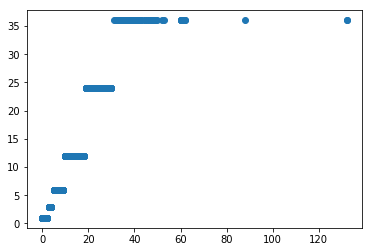

In [124]:
plt.scatter(df_A['months'], df_A['rebill_months'])

## Grouping the dataframe by rebill_months

In [125]:
# drop what we dont need
df_A.drop(columns = ['start_date', 'end_date', 'month_interval', 'months'], axis=1, inplace=True)

In [126]:
df_A.sample(10)

curr                BU   period    amount start_date_str end_date_str  \
130791  USD    Document Cloud  2016-12     -5.76       20161201     20170227   
245748  USD    Document Cloud  2018-11    -32.45       20181016     20181110   
25153   DKK    Document Cloud  2016-03   -140.16       20160119     20170118   
134505  USD    Document Cloud  2016-12   -142.93       20161126     20171122   
158739  USD    Document Cloud  2017-06     -9.99       20170525     20170601   
6442    AUD    Document Cloud  2016-07    -13.89       20160604     20160703   
20376   AUD  Experience Cloud  2017-12  18689.53       20171101     20171130   
217281  USD    Document Cloud  2018-05    -45.38       20180402     20181124   
165739  USD    Document Cloud  2017-07    -10.89       20170608     20171121   
203680  USD    Document Cloud  2018-03     -6.29       20180213     20180302   

        rebill_months  
130791            3.0  
245748            1.0  
25153            12.0  
134505           12.0  
158739            1.0  
6442              1.0  
20376             1.0  
217281            6.0  
165739            6.0  
203680            1.0

In [127]:
df_A['rebill_months'].value_counts()


12.0    107348
6.0      66637
1.0      57684
3.0      23258
24.0       692
36.0       546
Name: rebill_months, dtype: int64

In [ ]:
#gb_A = df_A.groupby(['currency', 'BU', 'period'], as_index=False).sum()
# The code above adds the months as well. I do not want this.

In [130]:
#df_A.curr.value_counts()

In [131]:
#medals = df.pivot_table('no of medals', ['Year', 'Country'], 'medal')
temp = df_A.pivot_table('amount', ['curr', 'BU', 'period'], 'rebill_months')

In [132]:
temp.fillna(0)

rebill_months                            1.0           3.0            6.0   \
curr BU                 period                                               
AUD  Creative           2015-06   7410.857222  4.127300e+02       0.000000   
                        2015-08   7284.192982  2.570450e+02       0.000000   
                        2015-09   7122.768056  0.000000e+00       0.000000   
                        2015-10   6726.175517  1.281800e+02       0.000000   
                        2015-11   6896.387241  4.500000e+02       0.000000   
                        2015-12   6904.457222  3.000000e+02       0.000000   
                        2016-01    -11.984000  0.000000e+00       0.000000   
                        2016-02   6664.847500  2.890900e+02     412.730000   
                        2016-03   6219.013333  0.000000e+00       0.000000   
                        2016-05   6710.357931  1.281800e+02       0.000000   
                        2016-06   6174.654531  0.000000e+00     412.730000   
                        2016-07   6045.849310  1.281800e+02       0.000000   
                        2016-08   6202.775862  0.000000e+00       0.000000   
                        2016-09   5923.717778  0.000000e+00       0.000000   
                        2016-10   5948.620000  1.281800e+02       0.000000   
                        2016-11   5906.068276  0.000000e+00       0.000000   
                        2016-12  11460.629459  0.000000e+00     825.460000   
                        2017-02  -5889.663611  0.000000e+00    -412.730000   
                        2017-03   5834.551828  2.140900e+02       0.000000   
                        2017-04   6343.430000  1.281800e+02       0.000000   
                        2017-05   5615.712414  0.000000e+00       0.000000   
                        2017-06   5477.573684  0.000000e+00     412.730000   
                        2017-07    -12.990000  0.000000e+00       0.000000   
                        2017-08   5664.959828  1.281800e+02       0.000000   
                        2017-09   5736.605278  0.000000e+00       0.000000   
                        2017-10   5362.475161  1.281800e+02       0.000000   
                        2017-11   5882.615333  0.000000e+00       0.000000   
                        2017-12   5921.575405  0.000000e+00     412.730000   
                        2018-01   -597.660000  0.000000e+00       0.000000   
                        2018-02    -12.990000  0.000000e+00       0.000000   
...                                       ...           ...            ...   
USD  Print & Publishing 2017-01   1482.777368  0.000000e+00       0.000000   
                        2017-02   7798.284500 -3.683486e+04       0.000000   
                        2017-03  14890.670241  1.947836e+06       0.000000   
                        2017-04  10346.872667  5.770000e+01       0.000000   
                        2017-05   3534.248214  6.486607e+05       0.000000   
                        2017-06  45544.731628  1.137298e+06   33835.615000   
                        2017-07  10565.250357  1.525000e+04       0.000000   
                        2017-08  29010.683333  1.936700e+06       0.000000   
                        2017-09  94512.310000  1.473558e+05  142478.250000   
                        2017-10   2436.216000  1.875000e+04  125376.375000   
                        2017-11   9983.796452  1.480686e+06       0.000000   
                        2017-12  92513.191500  2.195211e+05  129027.113333   
                        2018-01   1321.538462  5.917000e+01       0.000000   
                        2018-02   9568.044848  0.000000e+00       0.000000   
                        2018-03  93621.795000  1.530189e+06   -2700.000000   
                        2018-04   7436.793103  0.000000e+00       0.000000   
                        2018-05  32862.976071  2.119800e+03       0.000000   
                        2018-06  81976.712222  2.158825e+06       0.000000   
                      

In [133]:
temp.rename(columns = {1.0: 'one_month', 3.0:'three_months',
                                 6.0:'six_months', 12.0:'twelve_months',
                                 24.0:'two_years', 36.0:'three_years'}, inplace=True)


In [134]:
temp.columns

Index(['one_month', 'three_months', 'six_months', 'twelve_months', 'two_years',
       'three_years'],
      dtype='object', name='rebill_months')

In [135]:
df.head()

curr        BU   period  recognized  service  deferred_B  deferred_3Y  \
0  AUD  Creative  2015-06   490156.86      0.0         0.0          0.0   
1  AUD  Creative  2015-07   235045.62      0.0         0.0          0.0   
2  AUD  Creative  2015-07   235045.62      0.0         0.0          0.0   
3  AUD  Creative  2015-08   284334.70      0.0         0.0          0.0   
4  AUD  Creative  2015-08   284334.70      0.0         0.0          0.0   

   deferred_1M  deferred_3M  deferred_6M  deferred_1Y  deferred_2Y  
0   4992688.95          0.0          0.0   5828107.10     26443.20  
1   4115986.40          0.0          0.0   4815641.33     10399.50  
2   4115986.40          0.0          0.0   2865238.06     10399.50  
3   4365814.67          0.0          0.0   3857333.34      2316.62  
4   4365814.67          0.0          0.0   2793984.26      2316.62

In [136]:
# now I need to combine the new dataframe (df_A) with df
df_merged = pd.merge(df, temp, how='outer', 
                 left_on=['curr', 'BU', 'period'],
                right_on=['curr', 'BU', 'period'])
df_merged = df_merged.fillna(value=0)

In [137]:
df_merged.head()

curr        BU   period  recognized  service  deferred_B  deferred_3Y  \
0  AUD  Creative  2015-06   490156.86      0.0         0.0          0.0   
1  AUD  Creative  2015-07   235045.62      0.0         0.0          0.0   
2  AUD  Creative  2015-07   235045.62      0.0         0.0          0.0   
3  AUD  Creative  2015-08   284334.70      0.0         0.0          0.0   
4  AUD  Creative  2015-08   284334.70      0.0         0.0          0.0   

   deferred_1M  deferred_3M  deferred_6M  deferred_1Y  deferred_2Y  \
0   4992688.95          0.0          0.0   5828107.10     26443.20   
1   4115986.40          0.0          0.0   4815641.33     10399.50   
2   4115986.40          0.0          0.0   2865238.06     10399.50   
3   4365814.67          0.0          0.0   3857333.34      2316.62   
4   4365814.67          0.0          0.0   2793984.26      2316.62   

     one_month  three_months  six_months  twelve_months   two_years  \
0  7410.857222       412.730         0.0    4954.487778  608.377500   
1     0.000000         0.000         0.0       0.000000    0.000000   
2     0.000000         0.000         0.0       0.000000    0.000000   
3  7284.192982       257.045         0.0    5985.608103  648.305882   
4  7284.192982       257.045         0.0    5985.608103  648.305882   

   three_years  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

In [139]:
#df_merged.curr.value_counts()

In [140]:
df_merged['deferred_1M'] = df_merged['deferred_1M']+df_merged['one_month']
df_merged.drop(labels=['one_month'], axis=1, inplace=True)


In [141]:
df_merged.head()

curr        BU   period  recognized  service  deferred_B  deferred_3Y  \
0  AUD  Creative  2015-06   490156.86      0.0         0.0          0.0   
1  AUD  Creative  2015-07   235045.62      0.0         0.0          0.0   
2  AUD  Creative  2015-07   235045.62      0.0         0.0          0.0   
3  AUD  Creative  2015-08   284334.70      0.0         0.0          0.0   
4  AUD  Creative  2015-08   284334.70      0.0         0.0          0.0   

    deferred_1M  deferred_3M  deferred_6M  deferred_1Y  deferred_2Y  \
0  5.000100e+06          0.0          0.0   5828107.10     26443.20   
1  4.115986e+06          0.0          0.0   4815641.33     10399.50   
2  4.115986e+06          0.0          0.0   2865238.06     10399.50   
3  4.373099e+06          0.0          0.0   3857333.34      2316.62   
4  4.373099e+06          0.0          0.0   2793984.26      2316.62   

   three_months  six_months  twelve_months   two_years  three_years  
0       412.730         0.0    4954.487778  608.377500          0.0  
1         0.000         0.0       0.000000    0.000000          0.0  
2         0.000         0.0       0.000000    0.000000          0.0  
3       257.045         0.0    5985.608103  648.305882          0.0  
4       257.045         0.0    5985.608103  648.305882          0.0

In [142]:
df_merged['deferred_3M'] = df_merged['deferred_3M']+df_merged['three_months']
df_merged.drop(labels=['three_months'], axis=1, inplace=True)

df_merged['deferred_6M'] = df_merged['deferred_6M']+df_merged['six_months']
df_merged.drop(labels=['six_months'], axis=1, inplace=True)

df_merged['deferred_1Y'] = df_merged['deferred_1Y']+df_merged['twelve_months']
df_merged.drop(labels=['twelve_months'], axis=1, inplace=True)

df_merged['deferred_2Y'] = df_merged['deferred_2Y']+df_merged['two_years']
df_merged.drop(labels=['two_years'], axis=1, inplace=True)

df_merged['deferred_3Y'] = df_merged['deferred_3Y']+df_merged['three_years']
df_merged.drop(labels=['three_years'], axis=1, inplace=True)


In [143]:
df_merged.head()

curr        BU   period  recognized  service  deferred_B  deferred_3Y  \
0  AUD  Creative  2015-06   490156.86      0.0         0.0          0.0   
1  AUD  Creative  2015-07   235045.62      0.0         0.0          0.0   
2  AUD  Creative  2015-07   235045.62      0.0         0.0          0.0   
3  AUD  Creative  2015-08   284334.70      0.0         0.0          0.0   
4  AUD  Creative  2015-08   284334.70      0.0         0.0          0.0   

    deferred_1M  deferred_3M  deferred_6M   deferred_1Y   deferred_2Y  
0  5.000100e+06      412.730          0.0  5.833062e+06  27051.577500  
1  4.115986e+06        0.000          0.0  4.815641e+06  10399.500000  
2  4.115986e+06        0.000          0.0  2.865238e+06  10399.500000  
3  4.373099e+06      257.045          0.0  3.863319e+06   2964.925882  
4  4.373099e+06      257.045          0.0  2.799970e+06   2964.925882

In [144]:
df_merged.columns

Index(['curr', 'BU', 'period', 'recognized', 'service', 'deferred_B',
       'deferred_3Y', 'deferred_1M', 'deferred_3M', 'deferred_6M',
       'deferred_1Y', 'deferred_2Y'],
      dtype='object')

In [145]:
df_merged.head()

curr        BU   period  recognized  service  deferred_B  deferred_3Y  \
0  AUD  Creative  2015-06   490156.86      0.0         0.0          0.0   
1  AUD  Creative  2015-07   235045.62      0.0         0.0          0.0   
2  AUD  Creative  2015-07   235045.62      0.0         0.0          0.0   
3  AUD  Creative  2015-08   284334.70      0.0         0.0          0.0   
4  AUD  Creative  2015-08   284334.70      0.0         0.0          0.0   

    deferred_1M  deferred_3M  deferred_6M   deferred_1Y   deferred_2Y  
0  5.000100e+06      412.730          0.0  5.833062e+06  27051.577500  
1  4.115986e+06        0.000          0.0  4.815641e+06  10399.500000  
2  4.115986e+06        0.000          0.0  2.865238e+06  10399.500000  
3  4.373099e+06      257.045          0.0  3.863319e+06   2964.925882  
4  4.373099e+06      257.045          0.0  2.799970e+06   2964.925882

In [146]:
df_merged.tail()

curr               BU   period  recognized  service  deferred_B  \
4316  NOK  Other Solutions  2018-07         0.0      0.0         0.0   
4317  SEK  Other Solutions  2015-08         0.0      0.0         0.0   
4318  SEK  Other Solutions  2015-11         0.0      0.0         0.0   
4319  SEK  Other Solutions  2016-07         0.0      0.0         0.0   
4320  SEK  Other Solutions  2017-08         0.0      0.0         0.0   

      deferred_3Y  deferred_1M  deferred_3M  deferred_6M  deferred_1Y  \
4316          0.0          0.0          0.0          0.0     32891.96   
4317          0.0          0.0          0.0          0.0     28800.00   
4318          0.0          0.0          0.0          0.0     23580.00   
4319          0.0          0.0          0.0          0.0     21600.00   
4320          0.0          0.0          0.0          0.0     33934.80   

      deferred_2Y  
4316          0.0  
4317          0.0  
4318          0.0  
4319          0.0  
4320          0.0

In [147]:
df_merged['deferred_3M'].describe()

count    4.321000e+03
mean     4.495532e+06
std      1.007681e+07
min     -1.001754e+06
25%      0.000000e+00
50%      0.000000e+00
75%      1.631312e+06
max      4.392479e+07
Name: deferred_3M, dtype: float64

In [149]:
#df_merged.curr.value_counts()

# Loading Currency Data & Period Data

## Currency Map

The currency map is a list of countries (as an index) and the document currency that is the primary billing currency of that country. It is stored as a dataframe with an index ['Country'] and the column ['Currency']

In [150]:
curr_map = pd.read_excel('../data/Data_2019_P06/currency_map.xlsx', 'curr_map')
curr_map['Country'] = curr_map['Country'].map(lambda x: str(x)[:-4])
curr_map.set_index('Country', inplace=True)
curr_map

Currency
Country                       
Aus and New Zealand        AUD
Benelux                    EUR
Brazil                     USD
Canada                     USD
China                      USD
Eastern Europe             EUR
France                     EUR
Germany                    EUR
Hong Kong                  USD
Iberica                    EUR
India                      USD
Italy                      EUR
Japan                      JPY
Korea                      USD
Mediterranean              EUR
Mexico                     USD
Middle East & Turkey       USD
Nordic                     EUR
Russia & CIS               USD
Southeast Asia             USD
SSA & Israel               USD
Strat. Latin America       USD
Switzerland                EUR
Taiwan                     USD
United Kingdom             GBP
United States              USD

## FX Forward Rates
There are three forward rate variables created in this section of code and all are converted from normal currency quotes to indirect quotes such that any conversion back to USD will simply be the exchange rate multiplied by the document currency.

df_FX_rates - is a dataframe. The index to this dataframe is the document currency. The columns are the spot exchange rate and monthly forward exchange rates going out one year. 

FX_rates - is a numpy array containing the same data as the dataframe with the exception of the DC index. 
    rows - number of document currencies
    columns - Spot rate, 1M fwd rate, 2M fwd rate, ., ., ..... 12M fwd rate

list_FX_rates - a list containing the document currency corresponding with the FX_rates array.

In [151]:
def load_forward_rates():
    df_FX_rates = pd.read_excel('../data/Data_2019_P06/FX_data.xlsx', 'to_matlab')
    # converting vols to decimals (bloomberg downloads problem with rates)
    df_FX_rates['VOL_3M'] = df_FX_rates['VOL_3M']/100
    df_FX_rates['VOL_6M'] = df_FX_rates['VOL_6M']/100
    df_FX_rates['VOL_9M'] = df_FX_rates['VOL_9M']/100
    df_FX_rates['VOL_1Y'] = df_FX_rates['VOL_1Y']/100
    
    # invert indirect interest rates so that all currencies are in same format
    to_invert = df_FX_rates['Ticker'].str.slice(0,3).str.contains('USD')
    for index, row in df_FX_rates.iterrows():
         if to_invert.iloc[index] == True:
            df_FX_rates['Spot'].loc[index] = 1/row['Spot']
            df_FX_rates['FWD_3M'].loc[index]  = 1/row['FWD_3M']
            df_FX_rates['FWD_6M'].loc[index]  = 1/row['FWD_6M']
            df_FX_rates['FWD_9M'].loc[index]  = 1/row['FWD_9M']
            df_FX_rates['FWD_1Y'].loc[index]  = 1/row['FWD_1Y']
            
    # Interpolating the forward rates
    df_FX_rates['FWD_1M'] = df_FX_rates['Spot']* (2/3) + df_FX_rates['FWD_3M']*(1/3)
    df_FX_rates['FWD_2M'] = df_FX_rates['Spot']* (1/3) + df_FX_rates['FWD_3M']*(2/3)

    df_FX_rates['FWD_4M'] = df_FX_rates['FWD_3M']* (2/3) + df_FX_rates['FWD_6M']*(1/3)
    df_FX_rates['FWD_5M'] = df_FX_rates['FWD_3M']* (1/3) + df_FX_rates['FWD_6M']*(2/3)

    df_FX_rates['FWD_7M'] = df_FX_rates['FWD_6M']* (2/3) + df_FX_rates['FWD_9M']*(1/3)
    df_FX_rates['FWD_8M'] = df_FX_rates['FWD_6M']* (1/3) + df_FX_rates['FWD_9M']*(2/3)

    df_FX_rates['FWD_10M'] = df_FX_rates['FWD_9M']* (2/3) + df_FX_rates['FWD_1Y']*(1/3)
    df_FX_rates['FWD_11M'] = df_FX_rates['FWD_9M']* (1/3) + df_FX_rates['FWD_1Y']*(2/3)

    
    df_FX_rates.drop(['Ticker', 'VOL_3M', 'VOL_6M', 'VOL_9M', 'VOL_1Y'], axis=1, inplace=True)
    df_FX_rates.set_index('DC', inplace=True)
    
    sorted_columns = ['Spot', 'FWD_1M', 'FWD_2M','FWD_3M',
           'FWD_4M','FWD_5M','FWD_6M',
           'FWD_7M','FWD_8M','FWD_9M',
           'FWD_10M','FWD_11M','FWD_1Y']
    df_FX_rates = df_FX_rates[sorted_columns]
    
    list_FX_rates = df_FX_rates.index.to_list()
    FX_rates = df_FX_rates.to_numpy()
    
    return df_FX_rates, FX_rates, list_FX_rates

In [152]:
df_FX_rates, FX_rates, list_FX_rates = load_forward_rates()

C:\Users\davsmith\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


## FX Plan Rates 

This section pulls in plan forward rates in order to back into the document currency billings. (FP&A provides net new billings forecasts in terms of USD by country. The currency map is used to determine the primary currency of these billings and the forward rates are used to back these USD billings into document currency.)

book_FX_rates is a dataframe with an index['Currency'] and one column ['forward']. 

NOTE: The forward rates are all in terms direct.

In [153]:
book_FX_rates = pd.read_excel('../data/Data_2019_P06/FX_forward_rates.xlsx', sheet_name='forward_data', 
                        header=1,   index_col=1)

# dropping columns that are completely blank
book_FX_rates.dropna(how='all', axis='columns', inplace=True)

# first rename one of the unnamed columns that you intend to keep
# then delete the other unnamed columns
book_FX_rates.rename( columns={'Unnamed: 2': 'Currency', 'FWD REF':'forward'}, inplace=True)
                               
book_FX_rates.drop(['Pricing Date', 91, 'PX ASK', '% Change', 'SPOT', 'FWD'], axis=1, inplace=True)
book_FX_rates.set_index('Currency', inplace=True)
book_FX_rates

forward
Currency              
AED           3.673964
AUD           1.439320
BBD           2.013300
BMD           1.000000
BRL           3.954754
CAD           1.349750
CHF           0.993608
CLP         711.160000
COP        3399.421300
CNH           6.948031
CZK          23.169652
DKK           6.638631
EUR           0.889192
GBP           0.789246
HKD           7.830982
ILS           3.605797
INR          70.273850
JPY         107.615200
KRW        1186.041700
MDL          18.320000
MXN          19.927751
NOK           8.744978
NZD           1.532282
PLN           3.831749
RON           4.264321
RUB          66.334900
SEK           9.441049
SGD           1.375897
TRY           6.182971
TWD          31.599667
UAH          27.266400
ZAR          14.796300
PHP          52.508966
ARS          51.396600
BHD           0.377279
EGP          16.802700
IDR       14511.090000
JOD           0.712000
KWD           0.304503
LBP        1515.430000
MYR           4.193667
OMR           0.385725
PEN           3.399400
QAR           3.657550
SAR           3.751707
THB          31.510250

## Period Weeks
This section loads an excel file that contains the number of weeks in a period. 

Note: In the future this should be changed to be pulled directly from the ADOBE_FINANCIAL_CALENDAR datbase.

In [154]:
df_period_weeks = pd.read_excel('../data/Data_2019_P06/Period_weeks.xlsx', sheet_name='period_weeks')
df_period_weeks.set_index('Period', inplace=True)
df_period_weeks.sample(10)

Weeks
Period        
2018-11      4
2023-01      4
2020-02      4
2022-01      4
2018-09      5
2024-06      5
2024-05      4
2021-01      4
2017-08      4
2017-06      5

In [ ]:
whos

In [155]:
df_merged.columns

Index(['curr', 'BU', 'period', 'recognized', 'service', 'deferred_B',
       'deferred_3Y', 'deferred_1M', 'deferred_3M', 'deferred_6M',
       'deferred_1Y', 'deferred_2Y'],
      dtype='object')

## Messing with the forecast file

In [156]:
passed_fcst_length = fcst_length;
temp_fcst_length = 12;

last_period = key.fcst_last_period;
'''
output is a dataframe fcst.bill.deferred

fcst.bill.service
fcst.bill.recognized
fcst.bill.DC


each is 4 dimensional

    x - forecast length (time in months)
    y - length of the deferred rebill rules
    z - currency
    aa - bu
    
Just make this one big ass dataframe

Rows index = time

columns ['Currency']
        ['BU']
        ['recognized']
        ['service']
        ['deferred_1M', 'deferred_2M', ..... 'deferred_3M']
        
'''

NameError: name 'fcst_length' is not defined

In [157]:
df_fcst = pd.DataFrame(columns=['period', 'curr', 'BU', 'recognized', 'service', 'deferred_B',
                                'deferred_1M','deferred_3M','deferred_6M','deferred_1Y',
                                'deferred_2Y','deferred_3Y'])

In [158]:
df_fcst

Empty DataFrame
Columns: [period, curr, BU, recognized, service, deferred_B, deferred_1M, deferred_3M, deferred_6M, deferred_1Y, deferred_2Y, deferred_3Y]
Index: []

In [ ]:
df_merged.tail()

First attempt
create unique list of BUs and Currencies
loop through these and then copy over recognized and service billings and move through the columns indexing the others

A. Create period list

In [162]:
per = df_merged['period'].unique()
per.sort()
last_period = per[-1]

In [163]:
def build_fcst_periods(last_period, numb_periods):
    this_year = last_period[0:4]
    int_year = int(this_year)
    
    this_month = last_period[-2:]
    int_month = int(this_month)
    list_periods =[]
    
    for per in range(num_periods):
        int_month = int_month + 1
        if int_month > 12:
            int_month = 1
            int_year += 1
        
        if int_month < 10:
            temp_month_str = '0'+str(int_month)
        else:
            temp_month_str = str(int_month)
            
        list_periods.append(str(int_year)+'-'+temp_month_str)
    return list_periods
    

In [164]:
num_periods = 12
list_periods= build_fcst_periods(last_period, num_periods)
list_periods

['2019-07',
 '2019-08',
 '2019-09',
 '2019-10',
 '2019-11',
 '2019-12',
 '2020-01',
 '2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06']

In [159]:
# creating unique lists of currency and BU
list_curr = df_merged['curr'].unique()
print('list_curr: ', list_curr)

list_BU = df_merged['BU'].unique()
print('list_BU: ', list_BU)


list_curr:  ['AUD' 'BRL' 'CAD' 'CHF' 'DKK' 'EUR' 'GBP' 'HKD' 'JPY' 'KRW' 'NOK' 'NZD'
 'RUB' 'SEK' 'SGD' 'USD' 'ARS' 'CLP' 'COP' 'PEN' 'MXP']
list_BU:  ['Creative' 'Document Cloud' 'Experience Cloud' 'LiveCycle'
 'Other Solutions' 'Print & Publishing']


In [168]:
# creating some sort of massive loop to start


    
for this_curr in list_curr:
        
    for this_BU in list_BU:
        
        curr_array = []
        BU_array = []
        
        for period in list_periods:
    
            curr_array.append(this_curr)
            BU_array.append(this_BU)
        
        

        #print(period, ' ', curr, ' ', BU)
            this_df = df_merged[(df_merged['curr']==this_curr) & (df_merged['BU']==this_BU)]
            
            
            

SyntaxError: unexpected EOF while parsing (<ipython-input-168-95bf2b5bf084>, line 8)

In [169]:
df_merged.columns

Index(['curr', 'BU', 'period', 'recognized', 'service', 'deferred_B',
       'deferred_3Y', 'deferred_1M', 'deferred_3M', 'deferred_6M',
       'deferred_1Y', 'deferred_2Y'],
      dtype='object')

In [170]:
this_curr = list_curr[0]
this_BU = list_BU[0]
print('this_year: ', this_year)

AUD  :  Creative


In [173]:
this_df = df_merged[(df_merged['curr']==this_curr) & (df_merged['BU']==this_BU)]
this_df.tail()

curr        BU   period  recognized  service  deferred_B  deferred_3Y  \
53  AUD  Creative  2019-02   216462.60      0.0         0.0          0.0   
54  AUD  Creative  2019-03   164031.92      0.0         0.0          0.0   
55  AUD  Creative  2019-04   121348.81      0.0         0.0          0.0   
56  AUD  Creative  2019-05   100273.45      0.0         0.0          0.0   
57  AUD  Creative  2019-06   145603.84      0.0         0.0          0.0   

     deferred_1M  deferred_3M  deferred_6M   deferred_1Y  deferred_2Y  
53  1.415956e+07          0.0          0.0  7.382928e+06         0.00  
54  1.952702e+07          0.0          0.0  1.307520e+07        12.00  
55  1.508000e+07          0.0          0.0  8.961752e+06      6347.31  
56  1.537225e+07          0.0          0.0  8.354854e+06       320.00  
57  1.974360e+07          0.0          0.0  1.554657e+07       811.92

In [175]:
df_fcst.append()

12

In [178]:
# how do I do this?
# one by one???? Do I create the dataframes individually and then append?

curr_array = []
BU_array = []
period_array = list_periods
for per in list_periods:
    curr_array.append(this_curr)
    BU_array.append(this_BU)

print(curr_array)
print(BU_array)



['AUD', 'AUD', 'AUD', 'AUD', 'AUD', 'AUD', 'AUD', 'AUD', 'AUD', 'AUD', 'AUD', 'AUD']
['Creative', 'Creative', 'Creative', 'Creative', 'Creative', 'Creative', 'Creative', 'Creative', 'Creative', 'Creative', 'Creative', 'Creative']
